In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Enable IPython to display matplotlib graphs
%matplotlib inline

In [3]:
# Use the same df from the last lab.
df = pd.read_csv('processed_marketing_customer_analysis.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,index,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
9130,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
9131,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
9132,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


In [4]:
#1. Show DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          9134 non-null   int64  
 1   customer                       9134 non-null   object 
 2   state                          9134 non-null   object 
 3   customer_lifetime_value        9134 non-null   float64
 4   response                       9134 non-null   object 
 5   coverage                       9134 non-null   object 
 6   education                      9134 non-null   object 
 7   effective_to_date              9134 non-null   object 
 8   employment_status              9134 non-null   object 
 9   gender                         9134 non-null   object 
 10  income                         9134 non-null   int64  
 11  location_code                  9134 non-null   object 
 12  marital_status                 9134 non-null   o

In [5]:
 #2.Describe DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,9134.0,5490.357675,3148.183236,0.000000,2764.250000,5508.500000,8218.750000,10908.000000
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


In [6]:
#3. Show a plot of the total number of responses.
total_number_of_responses = df.describe().T.loc['index', 'count']
total_number_of_responses

9134.0

<BarContainer object of 1 artists>

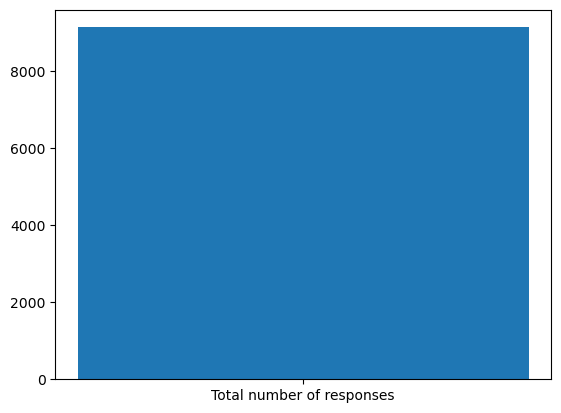

In [7]:
fig, ax  = plt.subplots()
ax.bar([1], [df.describe().T.loc['index', 'count']], width=0.5,
       tick_label=['Total number of responses'], align='center')


In [8]:
#4. Show a plot of the response rate by the sales channel.

In [31]:
#df_response = df['response'].value_counts()
#number_of_nos = df_response.loc['No']
#number_of_yes = df_response.loc['Yes']
#no_ratio = (number_of_nos / total_number_of_responses)*100
#yes_ratio = (number_of_yes / total_number_of_responses)*100

#df_response['No'] = no_ratio
#df_response['Yes']= yes_ratio

#df_response.plot(kind='bar')
#plt.title('Response Rate')
#plt.xlabel("Response")
#plt.ylabel('Percentage (%)')

Text(0.5, 1.0, 'Response Rate by Sales Channel')

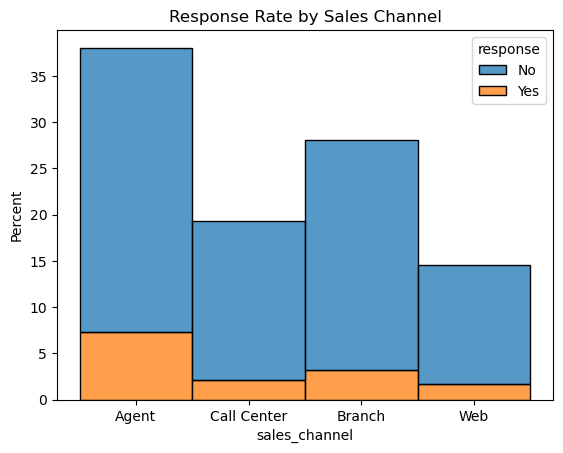

In [32]:
sns.histplot(data=df, x='sales_channel', hue='response', stat='percent', multiple='stack')
plt.title('Response Rate by Sales Channel')

In [ ]:
#5. Show a plot of the response rate by the total claim amount.

Text(0.5, 1.0, 'Response Rate by Total Claim Amount')

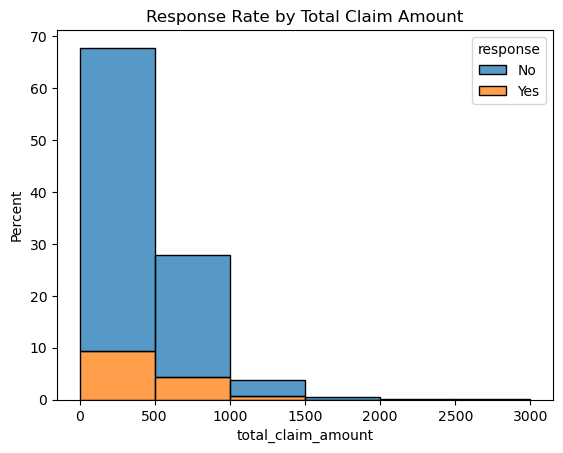

In [38]:
sns.histplot(data=df, x='total_claim_amount', hue='response', stat='percent', binwidth = 500, multiple='stack')
plt.title('Response Rate by Total Claim Amount')

In [ ]:
#6. Show a plot of the response rate by income.

Text(0.5, 1.0, 'Response Rate by Income')

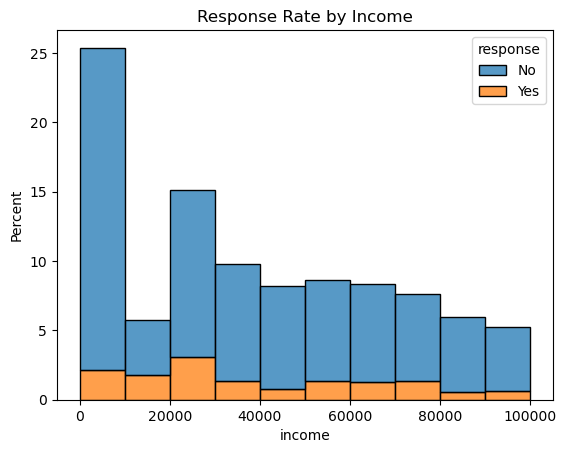

In [40]:
sns.histplot(data=df, x='income', hue='response', stat='percent', binwidth = 10000, multiple='stack')
plt.title('Response Rate by Income')